In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [82]:
# what does each row represent?
df=pd.read_csv('Data\police.csv')
df.head(3)

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [83]:
# what do these numbers mean?
df.shape

(91741, 15)

In [84]:
# what do these types mean?
df.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [85]:
df.describe()

,county_name,driver_age_raw,driver_age
count,0.0,86414.000000,86120.000000
mean,NaN,1970.491228,34.011333
std,NaN,110.914909,12.738564
min,NaN,0.000000,15.000000
25%,NaN,1967.000000,23.000000
50%,NaN,1980.000000,31.000000
75%,NaN,1987.000000,43.000000
max,NaN,8801.000000,99.000000


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

What does NaN mean?
Why might a value be missing?
Why mark it as NaN? Why not mark it as a 0 or an empty string or a string saying "Unknown"?

In [87]:
# what are these counts? how does this work?
df.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

1. Remove the column that only contains missing values

In [88]:
# axis=1 also works, inplace is False by default, inplace=True avoids assignment statement
df.drop('county_name', axis='columns', inplace=True)

In [89]:
df.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

2. Do men or women speed more often?

In [90]:
# when someone is stopped for speeding, how often is it a man or woman?
df[df.violation == 'Speeding'].driver_gender.value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [91]:
df.violation.value_counts()

Speeding               48463
Moving violation       16224
Equipment              11020
Other                   4317
Registration/plates     3432
Seat belt               2952
Name: violation, dtype: int64

In [92]:
# when someone is stopped for speeding, how often is it a man or woman?
df[df['violation'] == 'Speeding']['driver_gender'].value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [93]:
# when a man is pulled over, how often is it for speeding?
df[df.driver_gender == 'M'].violation.value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [94]:
# when a man is pulled over, how often is it for speeding?
df[df.driver_gender == 'M'].violation.value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [95]:
df['violation'].value_counts()

Speeding               48463
Moving violation       16224
Equipment              11020
Other                   4317
Registration/plates     3432
Seat belt               2952
Name: violation, dtype: int64

In [96]:
# combines the two lines above
df.groupby('driver_gender')['violation'].value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

3. Does gender affect who gets searched during a stop?

In [97]:
# ignore gender for the moment
df['search_conducted'].value_counts(normalize=True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [98]:
df['search_conducted'].mean()

0.03483720473942948

In [99]:
# search rate by gender
df.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

In [100]:
# include a second factor
df.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

4. Why is search_type missing so often?

In [101]:
df.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [102]:
# maybe search_type is missing any time search_conducted is False?
df.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [103]:
# test that theory, why is the Series empty?
df[df.search_conducted == False].search_type.value_counts()

Series([], Name: search_type, dtype: int64)

In [104]:
# value_counts ignores missing values by default
df[df.search_conducted == False].search_type.value_counts(dropna=False)


NaN    88545
Name: search_type, dtype: int64

In [105]:
# when search_conducted is True, search_type is never missing
df[df.search_conducted == True].search_type.value_counts(dropna=False)

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Inventory,Protective Frisk                                    11
Incident to Arrest,Inventory,Protective Frisk                 11
Protective Frisk,Reasonab

In [106]:
# alternative
df[df.search_conducted == True].search_type.isnull().sum()

0

5. During a search, how often is the driver frisked?

In [107]:
# multiple types are separated by commas
df.search_type.value_counts(dropna=False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Probable Cause,Protective Frisk                                33
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Incident to Arrest,Inventory,Protective Frisk                  11
Protective

In [108]:
# use bracket notation when creating a column
df['frisk'] = df.search_type == 'Protective Frisk'

In [109]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,False


In [110]:
df.frisk.dtype

dtype('bool')

In [111]:
# includes exact matches only
df.frisk.sum()

161

In [112]:
# is this the answer?
df.frisk.mean()

0.0017549405391264537

In [113]:
# uses the wrong denominator (includes stops that didn't involve a search)
df.frisk.value_counts()

False    91580
True       161
Name: frisk, dtype: int64

In [114]:
161 / (91580 + 161)

0.0017549405391264537

In [115]:
# includes partial matches
df['frisk'] = df.search_type.str.contains('Protective Frisk')

In [116]:
# seems about right
df.frisk.sum()

274

In [117]:
# frisk rate during a search
df.frisk.mean()

0.08573216520650813

6. Which year had the least number of stops?

In [118]:
# this works, but there's a better way
df.stop_date.str.slice(0, 4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [119]:
#make sure you create this column
combined = df.stop_date.str.cat(df.stop_time, sep=' ')
print(combined)


0        2005-01-02 01:55
1        2005-01-18 08:15
2        2005-01-23 23:15
3        2005-02-20 17:15
4        2005-03-14 10:00
               ...       
91736    2015-12-31 20:27
91737    2015-12-31 20:35
91738    2015-12-31 20:45
91739    2015-12-31 21:42
91740    2015-12-31 22:46
Name: stop_date, Length: 91741, dtype: object


In [120]:
df['stop_datetime'] = pd.to_datetime(combined)

In [121]:
# why is 2005 so much smaller?
df.stop_datetime.dt.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64

7. How does drug activity change by time of day? 

In [122]:
df.drugs_related_stop.dtype

dtype('bool')

In [123]:
# baseline rate
df.drugs_related_stop.mean()

0.008883705213590434

In [124]:
# can't groupby 'hour' unless you create it as a column
df.groupby(df.stop_datetime.dt.hour).drugs_related_stop.mean()

stop_datetime
0     0.019728
1     0.013507
2     0.015462
3     0.017065
4     0.011811
5     0.004762
6     0.003040
7     0.003281
8     0.002687
9     0.006288
10    0.005714
11    0.006976
12    0.004467
13    0.010326
14    0.007810
15    0.006416
16    0.005723
17    0.005517
18    0.010148
19    0.011596
20    0.008084
21    0.013342
22    0.013533
23    0.016344
Name: drugs_related_stop, dtype: float64

<AxesSubplot:xlabel='stop_datetime'>

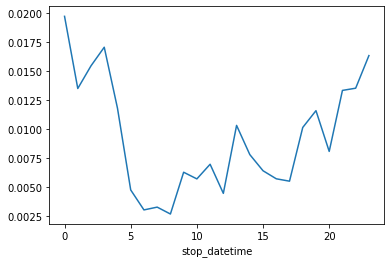

In [125]:
# line plot by default (for a Series)
df.groupby(df.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

8. Do most stops occur at night?

In [126]:
df.stop_datetime.dt.hour.value_counts()

10    7350
9     6838
11    5877
14    5634
23    5629
0     5221
8     5210
13    4842
15    4832
7     4572
1     4442
16    3844
12    3582
22    3473
20    3340
6     3290
2     2975
17    2900
19    2587
18    2168
21    1499
3     1172
4      254
5      210
Name: stop_datetime, dtype: int64

<AxesSubplot:>

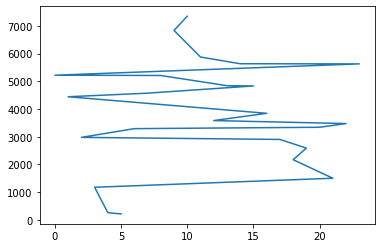

In [127]:
df.stop_datetime.dt.hour.value_counts().plot()

<AxesSubplot:>

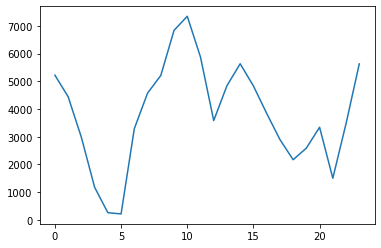

In [128]:
df.stop_datetime.dt.hour.value_counts().sort_index().plot()

9. Find the bad data in the stop_duration column and fix it

In [129]:
# mark bad data as missing
df.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [130]:
# solves SettingWithCopyWarning
df.loc[(df.stop_duration == '1') | (df.stop_duration == '2'), 'stop_duration'] = 'NaN'


In [131]:
# confusing!
df.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

In [132]:
# replace 'NaN' string with actual NaN value
import numpy as np
df.loc[df.stop_duration == 'NaN', 'stop_duration'] = np.nan

In [133]:
df.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

In [134]:
# alternative method
df.stop_duration.replace(['1', '2'], value=np.nan, inplace=True)

0. What is the mean stop_duration for each violation_raw?

In [135]:
# make sure you create this column
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}
df['stop_minutes'] = df.stop_duration.map(mapping)


In [136]:
df.stop_minutes.value_counts()

8.0     69543
23.0    13635
45.0     3228
Name: stop_minutes, dtype: int64

In [137]:
df.groupby('violation_raw').stop_minutes.mean()

violation_raw
APB                                 20.987342
Call for Service                    22.034669
Equipment/Inspection Violation      11.460345
Motorist Assist/Courtesy            16.916256
Other Traffic Violation             13.900265
Registration Violation              13.745629
Seatbelt Violation                   9.741531
Special Detail/Directed Patrol      15.061100
Speeding                            10.577690
Suspicious Person                   18.750000
Violation of City/Town Ordinance    13.388626
Warrant                             21.400000
Name: stop_minutes, dtype: float64

In [138]:
df.groupby('violation_raw').stop_minutes.agg(['mean', 'count'])

,mean,count
violation_raw,,
APB,20.987342,79
Call for Service,22.034669,1298
Equipment/Inspection Violation,11.460345,11020
Motorist Assist/Courtesy,16.916256,203
Other Traffic Violation,13.900265,16223
Registration Violation,13.745629,3432
Seatbelt Violation,9.741531,2952
Special Detail/Directed Patrol,15.061100,2455
Speeding,10.577690,48462


<AxesSubplot:xlabel='violation_raw'>

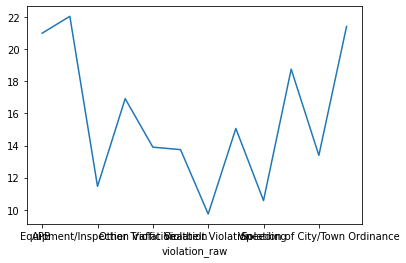

In [139]:
# what's wrong with this?
df.groupby('violation_raw').stop_minutes.mean().plot()

<AxesSubplot:ylabel='violation_raw'>

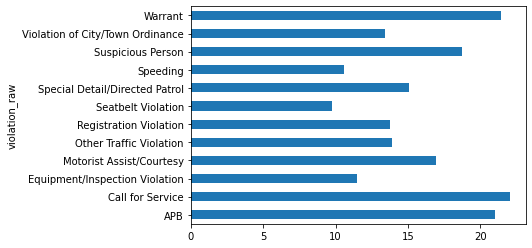

In [140]:
df.groupby('violation_raw').stop_minutes.mean().plot(kind='barh')

In [141]:
# good first step
df.groupby('violation').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,11007.0,31.781503,11.400900,16.0,23.0,28.0,38.0,89.0
Moving violation,16164.0,36.120020,13.185805,15.0,25.0,33.0,46.0,99.0
Other,4204.0,39.536870,13.034639,16.0,28.0,39.0,49.0,87.0
Registration/plates,3427.0,32.803035,11.033675,16.0,24.0,30.0,40.0,74.0
Seat belt,2952.0,32.206301,11.213122,17.0,24.0,29.0,38.0,77.0
Speeding,48361.0,33.530097,12.821847,15.0,23.0,30.0,42.0,90.0


<AxesSubplot:ylabel='Frequency'>

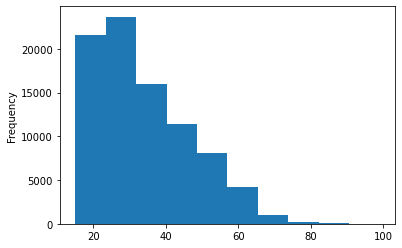

In [142]:
# histograms are excellent for displaying distributions
df.driver_age.plot(kind='hist')

<AxesSubplot:>

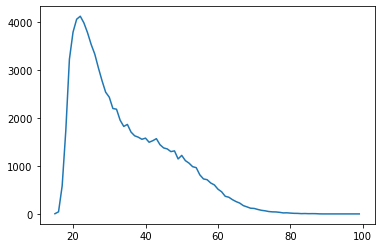

In [143]:
# similar to a histogram
df.driver_age.value_counts().sort_index().plot()

array([[<AxesSubplot:title={'center':'Equipment'}>,
        <AxesSubplot:title={'center':'Moving violation'}>],
       [<AxesSubplot:title={'center':'Other'}>,
        <AxesSubplot:title={'center':'Registration/plates'}>],
       [<AxesSubplot:title={'center':'Seat belt'}>,
        <AxesSubplot:title={'center':'Speeding'}>]], dtype=object)

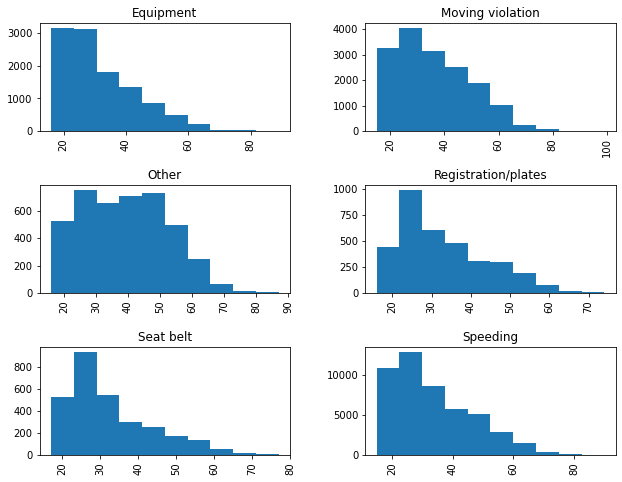

In [144]:
# can't use the plot method
df.hist('driver_age', by='violation',figsize=(10,8))

array([[<AxesSubplot:title={'center':'Equipment'}>,
        <AxesSubplot:title={'center':'Moving violation'}>],
       [<AxesSubplot:title={'center':'Other'}>,
        <AxesSubplot:title={'center':'Registration/plates'}>],
       [<AxesSubplot:title={'center':'Seat belt'}>,
        <AxesSubplot:title={'center':'Speeding'}>]], dtype=object)

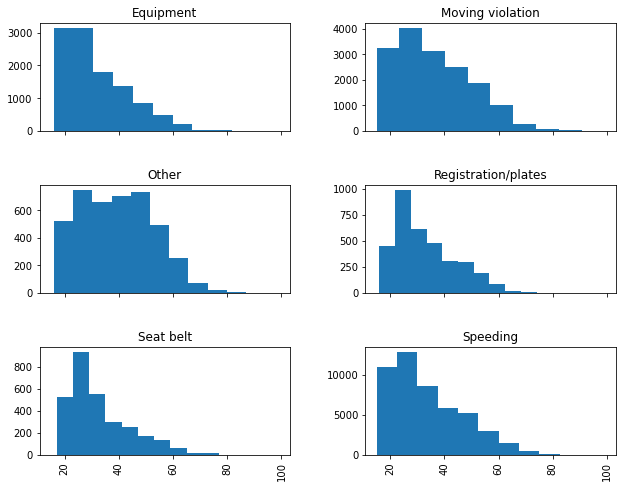

In [145]:
df.hist('driver_age', by='violation',figsize=(10,8),sharex=True)

array([[<AxesSubplot:title={'center':'Equipment'}>,
        <AxesSubplot:title={'center':'Moving violation'}>],
       [<AxesSubplot:title={'center':'Other'}>,
        <AxesSubplot:title={'center':'Registration/plates'}>],
       [<AxesSubplot:title={'center':'Seat belt'}>,
        <AxesSubplot:title={'center':'Speeding'}>]], dtype=object)

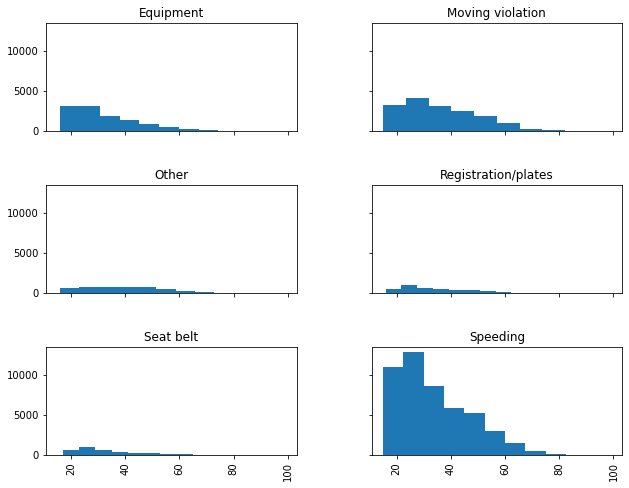

In [146]:
df.hist('driver_age', by='violation',figsize=(10,8),sharex=True, sharey=True)

13. Pretend you don't have the driver_age column, and create it from driver_age_raw (and call it new_age)

In [147]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime,stop_minutes
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-02 01:55:00,8.0
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-18 08:15:00,8.0
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-23 23:15:00,8.0
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN,2005-02-20 17:15:00,23.0
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-03-14 10:00:00,8.0


In [148]:
# appears to be year of stop_date minus driver_age_raw
df.tail()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime,stop_minutes
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,NaN,2015-12-31 20:27:00,8.0
91737,2015-12-31,20:35,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,NaN,2015-12-31 20:35:00,8.0
91738,2015-12-31,20:45,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False,NaN,2015-12-31 20:45:00,8.0
91739,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2015-12-31 21:42:00,8.0
91740,2015-12-31,22:46,M,1959.0,56.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2015-12-31 22:46:00,8.0


In [149]:
df['new_age'] = df.stop_datetime.dt.year - df.driver_age_raw

array([[<AxesSubplot:title={'center':'driver_age'}>,
        <AxesSubplot:title={'center':'new_age'}>]], dtype=object)

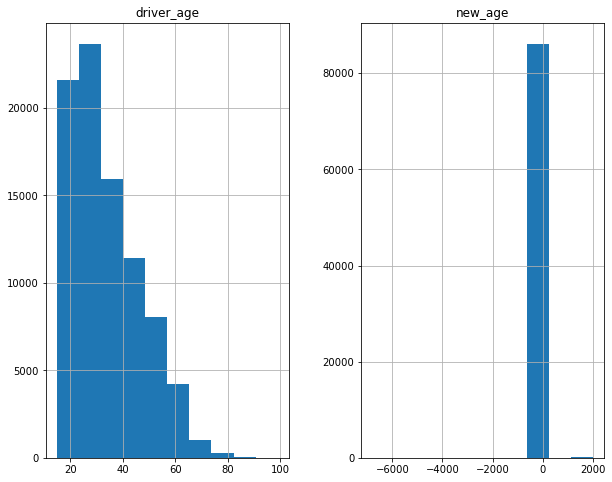

In [150]:
# compare the distributions
df[['driver_age', 'new_age']].hist(figsize=(10,8))

In [151]:
# compare the summary statistics (focus on min and max)
df[['driver_age', 'new_age']].describe()

,driver_age,new_age
count,86120.000000,86414.000000
mean,34.011333,39.784294
std,12.738564,110.822145
min,15.000000,-6794.000000
25%,23.000000,24.000000
50%,31.000000,31.000000
75%,43.000000,43.000000
max,99.000000,2015.000000


In [152]:
# calculate how many ages are outside that range
df[(df.new_age < 15) | (df.new_age > 99)].shape

(294, 18)

In [153]:
# raw data given to the researchers
df.driver_age_raw.isnull().sum()

5327

In [154]:
# age computed by the researchers (has more missing values)
df.driver_age.isnull().sum()

5621

In [155]:
# what does this tell us? researchers set driver_age as missing if less than 15 or more than 99
5621-5327

294

In [156]:
# driver_age_raw NOT MISSING, driver_age MISSING
df[(df.driver_age_raw.notnull()) & (df.driver_age.isnull())].head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime,stop_minutes,new_age
146,2005-10-05,08:50,M,0.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,NaN,2005-10-05 08:50:00,8.0,2005.0
281,2005-10-10,12:05,F,0.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False,NaN,2005-10-10 12:05:00,8.0,2005.0
331,2005-10-12,07:50,M,0.0,NaN,White,Motorist Assist/Courtesy,Other,False,NaN,No Action,False,0-15 Min,False,NaN,2005-10-12 07:50:00,8.0,2005.0
414,2005-10-17,08:32,M,2005.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,NaN,2005-10-17 08:32:00,8.0,0.0
455,2005-10-18,18:30,F,0.0,NaN,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,NaN,2005-10-18 18:30:00,8.0,2005.0


In [157]:
#set the ages outside that range as missing
df.loc[(df.new_age < 15) | (df.new_age > 99), 'new_age'] = np.nan

In [158]:
df.new_age.equals(df.driver_age)

True